<a href="https://colab.research.google.com/github/HosnawHb/Student-Academic-Performance-From_Scratch/blob/main/Pro1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
!gdown --id 1-Zyp-JP3f9QhPKaErBkPPFNKaPS1v74u

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1-Zyp-JP3f9QhPKaErBkPPFNKaPS1v74u
To: /content/Dataset.csv
100% 38.0k/38.0k [00:00<00:00, 45.8MB/s]


In [ ]:
categorical_attr = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']

In [ ]:
df = pd.read_csv('/content/Dataset.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [ ]:
df.head(15)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M


In [ ]:
print(df.shape)

(480, 17)


In [ ]:
df['Class'] = df['Class'].replace('H','M') #H and M should both be 1 so I make them the same

In [ ]:
# Converting Categorical values to scaler values
le = LabelEncoder()
df[categorical_attr] = df[categorical_attr].apply(le.fit_transform, axis=0)

In [ ]:
X = np.array(df.iloc[:, :-1]) #selecting all columns but the last one
y = np.array(df['Class'])

In [ ]:
# Deviding Dataset to training and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=12)

In [ ]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_val = scale.transform(X_val)

In [ ]:
print('Number of dataset: ', len(X))
print('Number of train set: ', len(X_train))
print('Number of validation set: ', len(X_val))
print("X_train: ",str(X_train.shape))
print("y_train: " ,str(y_train.shape))
print("X_val: " ,str(X_val.shape))
print("y_val:" ,str(y_val.shape))

Number of dataset:  480
Number of train set:  384
Number of validation set:  96
X_train:  (384, 16)
y_train:  (384,)
X_val:  (96, 16)
y_val: (96,)


In [ ]:
y_train = y_train.reshape(y_train.shape[0], -1).T
y_val =  y_val.reshape(y_val.shape[0], -1).T
X_train = X_train.T
X_val = X_val.T

In [ ]:
print("X_train: ",str(X_train.shape))
print("y_train: " ,str(y_train.shape))
print("X_val: " ,str(X_val.shape))
print("y_val:" ,str(y_val.shape))

X_train:  (16, 384)
y_train:  (1, 384)
X_val:  (16, 96)
y_val: (1, 96)


In [ ]:
df.head(15)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,1
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,1
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,0
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,0
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,1
5,0,4,4,2,1,0,7,0,0,42,30,13,70,1,0,0,1
6,1,4,4,1,4,0,8,0,0,35,12,0,17,0,0,0,0
7,1,4,4,1,4,0,8,0,0,50,10,15,22,1,1,1,1
8,0,4,4,1,4,0,8,0,0,12,21,16,50,1,1,1,1
9,0,4,4,1,4,1,7,0,0,70,80,25,70,1,1,1,1


## **DATA is now ready to be used**

# ***Implementing Model***

In [ ]:
#parameter(w,b) initialization
def param(layers):
   parameters={}
   n = len(layers)
   for i in range (1,n):
      parameters["W"+str(i)]= np.random.randn(layers[i], layers[i-1])*np.sqrt((2/layers[i - 1]))
      parameters["b"+str(i)]= np.zeros((layers[i],1))
   return parameters

In [ ]:
parameters = param([X_train.shape[0],1])
print(X_train.shape[0])
layers = ([X_train.shape[0],1])
n = len(layers)
for i in range(1,n):
  print("W"+str(i)+"=" + str(parameters["W"+str(i)]))
  print("b"+str(i)+"=" + str(parameters["b"+str(i)]))

16
W1=[[-0.29770666  0.32105157  0.16007829  0.6195421  -0.06233651  0.36217256
  -0.20557374  0.57227017 -0.3736419  -0.15859089  0.18422214  0.53227373
   0.18592427 -0.61136313 -0.05447576 -0.83386158]]
b1=[[0.]]


## **Forward Propagation**

In [ ]:
def LF(A,W,b): #calculating Z, z=W^TX + b
  Z = np.dot(W,A)+b
  cache = (A,W,b)
  return Z,cache

In [ ]:
def sigmoid(Z): #sigmoid activation function
   Z = Z.astype(float)
   A = 1/(1+np.exp(-Z))
   cache = Z
   return A,cache

In [ ]:
def relu(Z): #relu activation function
 A = np.maximum(0,Z)
 cache = Z
 return A,cache

In [ ]:
def LAF(A,W,b,activation): #Applying activation function
  if activation == "sigmoid":
    Z,lCache = LF(A,W,b) #calculating Z
    A,acCache = sigmoid(Z) #sigmoid activation function
  elif activation == "relu":
    Z,lCache = LF(A,W,b) #calculating z
    A,acCache = relu(Z) #applying activation function
  cache = (lCache,acCache)
  return A,cache

In [ ]:
def forwardPropagation(Xtrain,parameters): #forward propagation
  caches = []
  A = Xtrain
  n = len(parameters) // 2 #layernumbers
  for i in range(1,n):
    Aprev = A
    W = parameters["W"+str(i)]
    b = parameters["b"+str(i)]
    A,cache = LAF(Aprev,W,b,activation="relu")
    caches.append(cache)
  W = parameters["W" + str(n)]
  b = parameters["b" + str(n)]
  Al, cache = LAF(A,W,b,activation = "sigmoid")
  caches.append(cache)
  return Al,caches

In [ ]:
def costCompute(A,Y):
  m = Y.shape[1]
  #E= -1/n ∑(𝑦𝑖 log(𝑎𝑖) + (1 − 𝑦𝑖)log(1 − 𝑎𝑖))
  loss = Y*np.log(A) + (1-Y)*(np.log(1-A))
  cost = (-1/m)*np.sum(loss)
  cost = np.squeeze(cost)
  return cost

## **Backward Propagation**

In [ ]:
def bRelu(dA,cache): #backward relu
  Z = cache
  dZ = np.array(dA, copy=True)
  dZ[Z <= 0] = 0
  return dZ

In [ ]:
def bSigmoid(dA,zCache): #backward sigmoid
  zCache = zCache.astype(float)
  s = 1/(1+np.exp(-zCache))
  dz = dA * s * (1-s)
  return dz

In [ ]:
def LB(dz, cache): #calculating dw and db
 Ap,W,b = cache
 m = Ap.shape[1]
 #∂E/∂W = (1/m)X(A-Y)^T
 dW = (1/m) * np.dot(dz,Ap.T)
 #∂E/∂b = (1/m)∑(ai-yi)
 db = (1/m) * np.sum(dz, axis=1, keepdims=True)
 dAp = np.dot(W.T,dz)
 return dAp,dW,db

In [ ]:
def LAB(dA,cache,activation): #Applying activation functions
  lCache,actCache = cache
  if activation == "relu":
   dz = bRelu(dA,actCache) #calculating dz
   dAp,dW,db = LB(dz,lCache)
  elif activation == "sigmoid":
   dz = bSigmoid(dA,actCache) #calculating dz
   dAp,dW,db = LB(dz,lCache)
  return dAp, dW, db

In [ ]:
def BackwardPropagation(A,Y,cache):
  grads = {} #𝜕E/∂W and ∂E/∂b
  L = len(cache) #Layer numbers
  dA = -(np.divide(Y,A)-np.divide(1-Y,1-A))
  ccache = cache[L-1]
  grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = LAB(dA, ccache, activation = "sigmoid")
  for i in reversed(range(L-1)):
    ccache = cache[i]
    dAptmp, dWtmp, dbtmp = LAB(grads["dA" + str(i + 1)], ccache, activation = "relu")
    grads["dA" + str(i)] = dAptmp
    grads["dW" + str(i + 1)] = dWtmp
    grads["db" + str(i + 1)] = dbtmp
  return grads


In [ ]:
def ParamUpdate(parameters,grads,lr):
  L = len(parameters)//2
  for i in range(L):
    # W = W - ⍶*∂E/∂W
    parameters["W" + str(i+1)] = parameters["W" + str(i+1)] - (lr * grads["dW" + str(i+1)])
    # b = b - ⍶*∂E/∂b
    parameters["b" + str(i+1)] = parameters["b" + str(i+1)] - (lr * grads["db" + str(i+1)])
  return parameters

# ***Training the model***

In [ ]:
def predict(parameters,X):
  m = X.shape[1]
  ypred = np.zeros((1,m))
  #w = parameters["W"+str(1)]
  #w = w.reshape(X.shape[0],1)
  A,cache = forwardPropagation(X,parameters) #forward prop to calculate prediction
  for i in range(0,A.shape[1]):
    if A[0,i] > 0.5:
      ypred[0,i] = 1
    else:
      ypred[0,i] = 0
  return ypred,A

In [ ]:
def Model(X,Y,Xval,Yval,dim,lr=0.1,epoch=1000,print_cost=False): #making the model
  costTrain = []
  AccTrain = []
  costVal = []
  AccVal= []
  parameters = param(dim) #initializing parameters
  for i in range (0,epoch+1):
    A,cache = forwardPropagation(X,parameters) #forward propagation
    costT = costCompute(A,Y) #calculating train cost
    grads = BackwardPropagation(A,Y,cache) #backward propagation (dw,db)
    parameters = ParamUpdate(parameters,grads,lr) #updating parameters
    ypredTrain,A= predict(parameters , X) #calculating Train prediction
    AccT = np.sum((ypredTrain == Y)/X.shape[1])*100 #train accuracy
    ypredVal,Aval= predict(parameters,Xval) #validation prediction
    costV = costCompute(Aval,Yval) #validation cost
    AccV = np.sum((ypredVal == Yval)/Xval.shape[1])*100 #validation accuracy
    if i % 10 == 0:
        costTrain.append(costT)
        AccTrain.append(AccT/100)
        costVal.append(costV)
        AccVal.append(AccV/100)
        print(f"Iteration{i}")
        print(f"TrainCost:{costT}---TrainAcc:{AccT}")
        print(f"ValCost:{costV}---Valacc:{AccV} ")
        print("-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*")
  return parameters,costTrain,AccTrain,costVal,AccVal,ypredTrain


# **2_layer_random**

In [ ]:
parameters,costTrain,AccTrain,costVal,AccVal,pred = Model(X_train,y_train,X_val,y_val,dim=(X_train.shape[0], 1),lr=0.01,epoch=1000)

Iteration0
TrainCost:0.9868452909301323---TrainAcc:41.666666666666664
ValCost:0.9796659384150722---Valacc:43.75 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Iteration10
TrainCost:0.9164329645227026---TrainAcc:45.05208333333333
ValCost:0.909042962835677---Valacc:50.0 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Iteration20
TrainCost:0.8541490949656247---TrainAcc:47.135416666666664
ValCost:0.8464892328455607---Valacc:52.08333333333333 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Iteration30
TrainCost:0.7992178065708503---TrainAcc:50.52083333333333
ValCost:0.791244781034881---Valacc:55.20833333333333 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Iteration40
TrainCost:0.7508465001895925---TrainAcc:52.86458333333333
ValCost:0.7425349162442187---Valacc:59.375 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Iteration50
TrainCost:0.7082635035103744---TrainAcc:58.33333333333333
ValCost:0.6996051715042766---Valacc:61.45833333333333 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

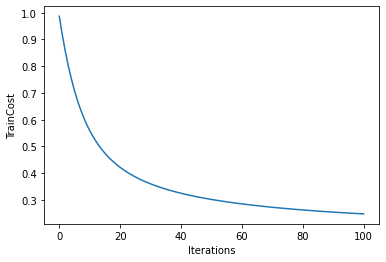

In [ ]:
plt.plot(costTrain)
plt.ylabel('TrainCost')
plt.xlabel('Iterations')
plt.show()

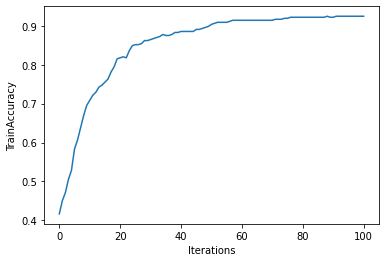

In [ ]:
plt.plot(AccTrain)
plt.ylabel('TrainAccuracy')
plt.xlabel('Iterations')
plt.show()

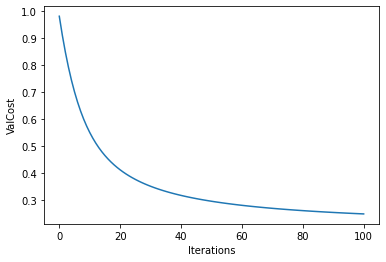

In [ ]:
plt.plot(costVal)
plt.ylabel('ValCost')
plt.xlabel('Iterations')
plt.show()

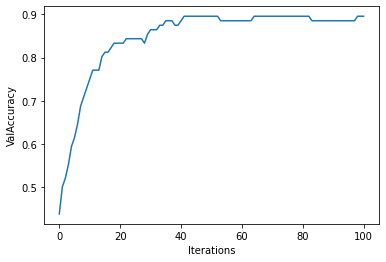

In [ ]:
plt.plot(AccVal)
plt.ylabel('ValAccuracy')
plt.xlabel('Iterations')
plt.show()

#***3_layer_Random***

In [ ]:
parameters3,costTrain3,AccTrain3,costVal3,AccVal3,pred3=Model(X_train,y_train,X_val,y_val,dim=([X_train.shape[0],55,1]),lr=0.01,epoch=1000)

Iteration0
TrainCost:1.2907769498968844---TrainAcc:32.81249999999999
ValCost:1.0792229587180178---Valacc:34.375 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Iteration10
TrainCost:0.989288591336365---TrainAcc:49.21875
ValCost:0.8037639522411075---Valacc:55.20833333333333 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Iteration20
TrainCost:0.8102659166511571---TrainAcc:63.54166666666667
ValCost:0.6509708959088923---Valacc:72.91666666666666 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Iteration30
TrainCost:0.6944780386409702---TrainAcc:67.44791666666667
ValCost:0.5583652444572109---Valacc:76.04166666666666 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Iteration40
TrainCost:0.6122306280567678---TrainAcc:70.05208333333333
ValCost:0.49589639731019586---Valacc:78.125 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Iteration50
TrainCost:0.5506194113538027---TrainAcc:71.09375
ValCost:0.45071345788747486---Valacc:79.16666666666667 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

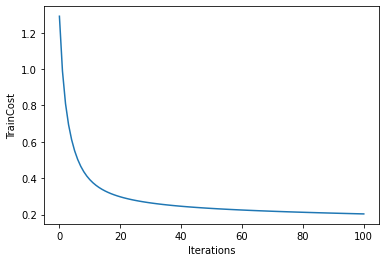

In [ ]:
plt.plot(costTrain3)
plt.ylabel('TrainCost')
plt.xlabel('Iterations')
plt.show()

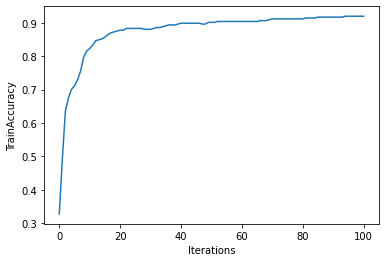

In [ ]:
plt.plot(AccTrain3)
plt.ylabel('TrainAccuracy')
plt.xlabel('Iterations')
plt.show()

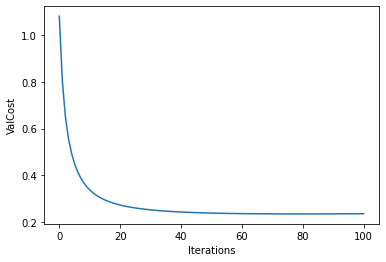

In [ ]:
plt.plot(costVal3)
plt.ylabel('ValCost')
plt.xlabel('Iterations')
plt.show()

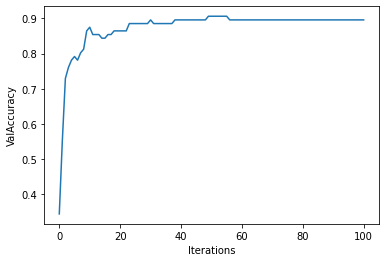

In [ ]:
plt.plot(AccVal3)
plt.ylabel('ValAccuracy')
plt.xlabel('Iterations')
plt.show()

# **5_layer_random**

In [ ]:
parameters5,costTrain5,AccTrain5,costVal5,AccVal5,pred5=Model(X_train,y_train,X_val,y_val,dim=([X_train.shape[0],55,30,10,1]),lr=0.01,epoch=1000)

Iteration0
TrainCost:0.75747596321241---TrainAcc:53.385416666666664
ValCost:0.7052148336623367---Valacc:52.08333333333333 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Iteration10
TrainCost:0.6818931842091029---TrainAcc:67.96875
ValCost:0.6266847598388345---Valacc:70.83333333333334 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Iteration20
TrainCost:0.6281232267655131---TrainAcc:71.875
ValCost:0.5709745395620938---Valacc:79.16666666666667 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Iteration30
TrainCost:0.5868844270327626---TrainAcc:73.4375
ValCost:0.5279550422568762---Valacc:80.20833333333334 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Iteration40
TrainCost:0.5539604868665384---TrainAcc:73.69791666666666
ValCost:0.49369134758943733---Valacc:81.25 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Iteration50
TrainCost:0.5268720417657456---TrainAcc:74.73958333333334
ValCost:0.46617051118828284---Valacc:80.20833333333334 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

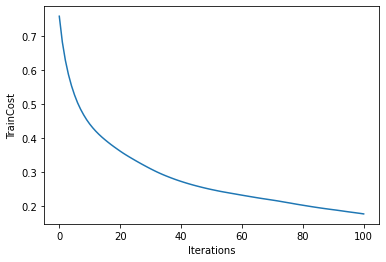

In [ ]:
plt.plot(costTrain5)
plt.ylabel('TrainCost')
plt.xlabel('Iterations')
plt.show()

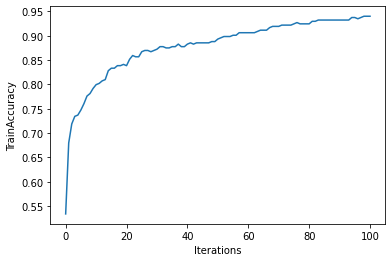

In [ ]:
plt.plot(AccTrain5)
plt.ylabel('TrainAccuracy')
plt.xlabel('Iterations')
plt.show()

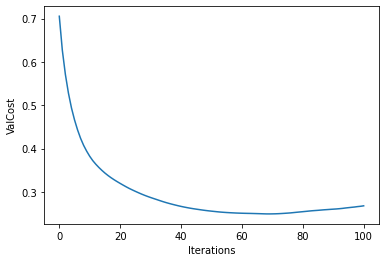

In [ ]:
plt.plot(costVal5)
plt.ylabel('ValCost')
plt.xlabel('Iterations')
plt.show()

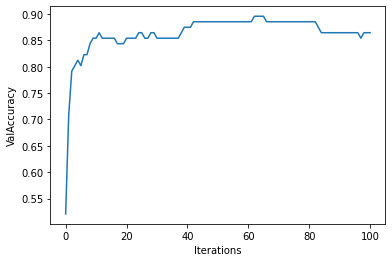

In [ ]:
plt.plot(AccVal5)
plt.ylabel('ValAccuracy')
plt.xlabel('Iterations')
plt.show()

# zero initialization

In [ ]:
def paramZero(layers): #zero initialization
  parameters={}
  n = len(layers)
  for i in range(1,n):
      parameters["W"+str(i)] = np.zeros((layers[i],layers[i-1]))
      parameters["b"+str(i)] = np.zeros((layers[i],1))
  return parameters

In [ ]:
def ModelZero(X,Y,Xval,Yval,dim,lr=0.1,epoch=1000,print_cost=False):
  costTrain = []
  AccTrain = []
  costVal = []
  AccVal= []
  parameters = paramZero(dim)
  for i in range (0,epoch+1):
    A,cache = forwardPropagation(X,parameters)
    costT = costCompute(A,Y)
    grads = BackwardPropagation(A,Y,cache)
    parameters = ParamUpdate(parameters,grads,lr)
    ypredTrain,A= predict(parameters , X)
    AccT = np.sum((ypredTrain == Y)/X.shape[1])*100
    ypredVal,Aval= predict(parameters,Xval)
    costV = costCompute(Aval,Yval)
    AccV = np.sum((ypredVal == Yval)/Xval.shape[1])*100
    if i % 10 == 0:
        costTrain.append(costT)
        AccTrain.append(AccT/100)
        costVal.append(costV)
        AccVal.append(AccV/100)
        print(f"Iteration:{i}")
        print(f"TrainCost:{costT}---TrainAcc:{AccT}")
        print(f"ValCost:{costV}---Valacc:{AccV} ")
        print("-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*")
  return parameters,costTrain,AccTrain,costVal,AccVal,ypredTrain


# **2_layer_zero**

In [ ]:
parameters02,costTrain02,AccTrain02,costVal02,AccVal02,pred02 = ModelZero(X_train,y_train,X_val,y_val,dim=(X_train.shape[0], 1),lr=0.01,epoch=1000)

Iteration:0
TrainCost:0.6931471805599452---TrainAcc:84.375
ValCost:0.6886820916301707---Valacc:83.33333333333334 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Iteration:10
TrainCost:0.6516819325523194---TrainAcc:84.63541666666667
ValCost:0.6478156350326479---Valacc:83.33333333333334 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Iteration:20
TrainCost:0.6165041164782062---TrainAcc:84.89583333333334
ValCost:0.6129939295526637---Valacc:83.33333333333334 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Iteration:30
TrainCost:0.5864961788341889---TrainAcc:85.15625
ValCost:0.5831613331174387---Valacc:83.33333333333334 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Iteration:40
TrainCost:0.560727676280976---TrainAcc:85.67708333333334
ValCost:0.5574374579132544---Valacc:83.33333333333334 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Iteration:50
TrainCost:0.5384379908940874---TrainAcc:85.67708333333334
ValCost:0.5351004831507012---Valacc:83.33333333333334 
-*-*-*-*-*-*-*-*-*-*-

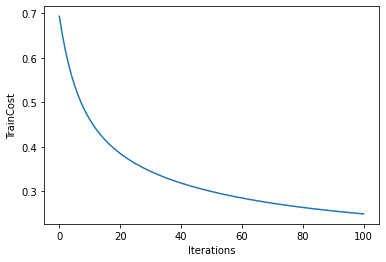

In [ ]:
plt.plot(costTrain02)
plt.ylabel('TrainCost')
plt.xlabel('Iterations')
plt.show()

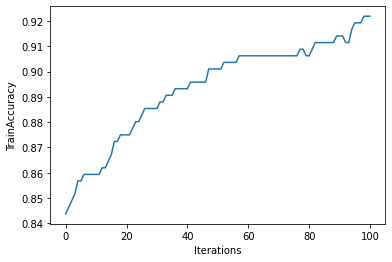

In [ ]:
plt.plot(AccTrain02)
plt.ylabel('TrainAccuracy')
plt.xlabel('Iterations')
plt.show()

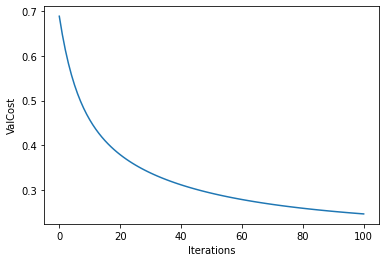

In [ ]:
plt.plot(costVal02)
plt.ylabel('ValCost')
plt.xlabel('Iterations')
plt.show()

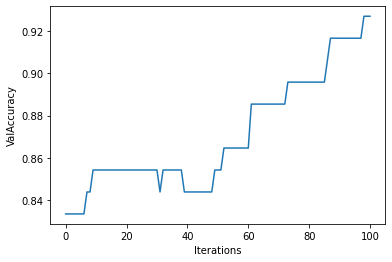

In [ ]:
plt.plot(AccVal02)
plt.ylabel('ValAccuracy')
plt.xlabel('Iterations')
plt.show()

# **3_layer_zero**

In [ ]:
parameters03,costTrain03,AccTrain03,costVal03,AccVal03,pred03 = ModelZero(X_train,y_train,X_val,y_val,dim=(X_train.shape[0],5,1),lr=0.01,epoch=1000)

Iteration:0
TrainCost:0.6931471805599452---TrainAcc:72.39583333333333
ValCost:0.6925179247140024---Valacc:78.125 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Iteration:10
TrainCost:0.6882488004441872---TrainAcc:72.39583333333333
ValCost:0.686378420692827---Valacc:78.125 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Iteration:20
TrainCost:0.6835895772859761---TrainAcc:72.39583333333333
ValCost:0.6805081549526882---Valacc:78.125 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Iteration:30
TrainCost:0.6791577573415593---TrainAcc:72.39583333333333
ValCost:0.6748946438689416---Valacc:78.125 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Iteration:40
TrainCost:0.6749421226199548---TrainAcc:72.39583333333333
ValCost:0.6695259515469415---Valacc:78.125 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Iteration:50
TrainCost:0.6709319742140898---TrainAcc:72.39583333333333
ValCost:0.6643906736699502---Valacc:78.125 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Iteration:60
Train

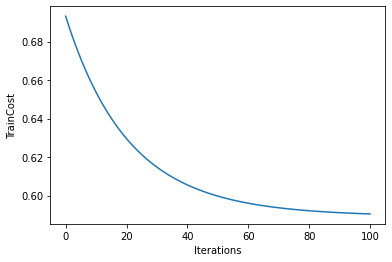

In [ ]:
plt.plot(costTrain03)
plt.ylabel('TrainCost')
plt.xlabel('Iterations')
plt.show()

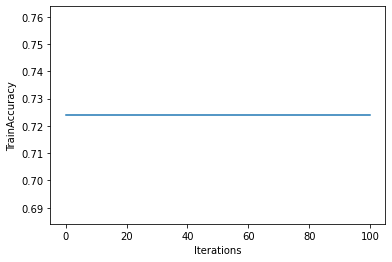

In [ ]:
plt.plot(AccTrain03)
plt.ylabel('TrainAccuracy')
plt.xlabel('Iterations')
plt.show()

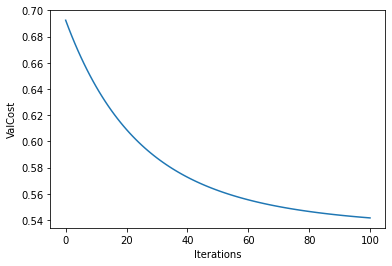

In [ ]:
plt.plot(costVal03)
plt.ylabel('ValCost')
plt.xlabel('Iterations')
plt.show()

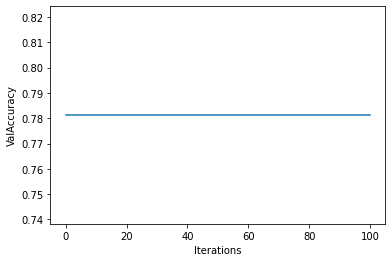

In [ ]:
plt.plot(AccVal03)
plt.ylabel('ValAccuracy')
plt.xlabel('Iterations')
plt.show()

# **5_layer_zero**

In [ ]:
parameters05,costTrain05,AccTrain05,costVal05,AccVal05,pred05 = ModelZero(X_train,y_train,X_val,y_val,dim=(X_train.shape[0],5,1),lr=0.01,epoch=1000)

Iteration:0
TrainCost:0.6931471805599452---TrainAcc:72.39583333333333
ValCost:0.6925179247140024---Valacc:78.125 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Iteration:10
TrainCost:0.6882488004441872---TrainAcc:72.39583333333333
ValCost:0.686378420692827---Valacc:78.125 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Iteration:20
TrainCost:0.6835895772859761---TrainAcc:72.39583333333333
ValCost:0.6805081549526882---Valacc:78.125 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Iteration:30
TrainCost:0.6791577573415593---TrainAcc:72.39583333333333
ValCost:0.6748946438689416---Valacc:78.125 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Iteration:40
TrainCost:0.6749421226199548---TrainAcc:72.39583333333333
ValCost:0.6695259515469415---Valacc:78.125 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Iteration:50
TrainCost:0.6709319742140898---TrainAcc:72.39583333333333
ValCost:0.6643906736699502---Valacc:78.125 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Iteration:60
Train

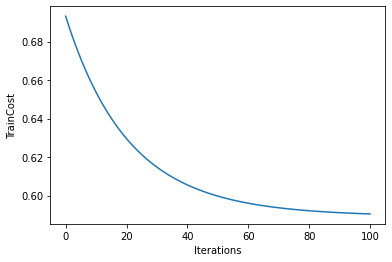

In [ ]:
plt.plot(costTrain05)
plt.ylabel('TrainCost')
plt.xlabel('Iterations')
plt.show()

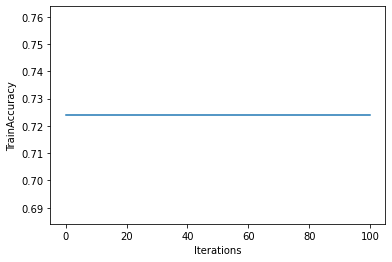

In [ ]:
plt.plot(AccTrain05)
plt.ylabel('TrainAccuracy')
plt.xlabel('Iterations')
plt.show()

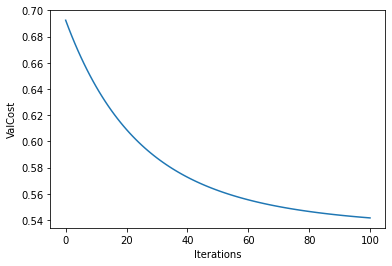

In [ ]:
plt.plot(costVal05)
plt.ylabel('ValCost')
plt.xlabel('Iterations')
plt.show()

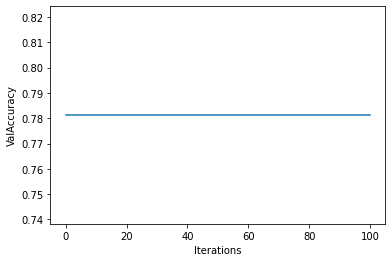

In [ ]:
plt.plot(AccVal05)
plt.ylabel('ValAccuracy')
plt.xlabel('Iterations')
plt.show()